<a href="https://colab.research.google.com/github/robertopaulo/CienciaDeDados/blob/main/An%C3%A1lise_Salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**📊 Análise do Dataset de Salários em Ciência de Dados**






In [1]:
import pandas as pd

[Link do dataset salary.csv](https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs?select=salaries.csv)

In [2]:
from google.colab import files

# Fazer upload do arquivo do seu computador
uploaded = files.upload()

Saving salaries.csv to salaries.csv


In [3]:
# Carregar o arquivo CSV
df = pd.read_csv('salaries.csv')

# Visualizar as primeiras linhas
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [5]:
print("Número de linhas:", df.shape[0])
print("Número de colunas:", df.shape[1])
print("\nColunas do dataset:")
print(df.columns.tolist())

# Visualizar os tipos de dados
df.info()


Número de linhas: 133349
Número de colunas: 11

Colunas do dataset:
['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           133349 non-null  int64 
 1   experience_level    133349 non-null  object
 2   employment_type     133349 non-null  object
 3   job_title           133349 non-null  object
 4   salary              133349 non-null  int64 
 5   salary_currency     133349 non-null  object
 6   salary_in_usd       133349 non-null  int64 
 7   employee_residence  133349 non-null  object
 8   remote_ratio        133349 non-null  int64 
 9   company_location    133349 non-null  object
 10  company_size        133349 non-null  objec

In [6]:
# Estatísticas básicas de todas as colunas numéricas
df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,133349.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358705,1.632833e+05,157617.272098,20.905669
std,0.680788,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
print("Média:", df['salary_in_usd'].mean())
print("Mediana:", df['salary_in_usd'].median())
print("Desvio Padrão:", df['salary_in_usd'].std())
print("Mínimo:", df['salary_in_usd'].min())
print("Máximo:", df['salary_in_usd'].max())


Média: 157617.27209802848
Mediana: 146206.0
Desvio Padrão: 74288.36309736302
Mínimo: 15000
Máximo: 800000


In [8]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['salary_in_usd'] < Q1 - 1.5 * IQR) | (df['salary_in_usd'] > Q3 + 1.5 * IQR)]

print("Quantidade de outliers:", outliers.shape[0])
outliers[['job_title', 'salary_in_usd']]


Quantidade de outliers: 2976


,job_title,salary_in_usd
267,AI Researcher,350000
311,Research Engineer,405000
346,Manager,364254
348,Machine Learning Engineer,342000
435,Manager,425000
...,...,...
133079,Applied Data Scientist,380000
133131,Research Scientist,450000
133276,Principal Data Scientist,416000
133341,Applied Machine Learning Scientist,423000


# Gráficos

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito para os gráficos
sns.set(style="whitegrid")


**1. Distribuição dos Salários (salary_in_usd)**

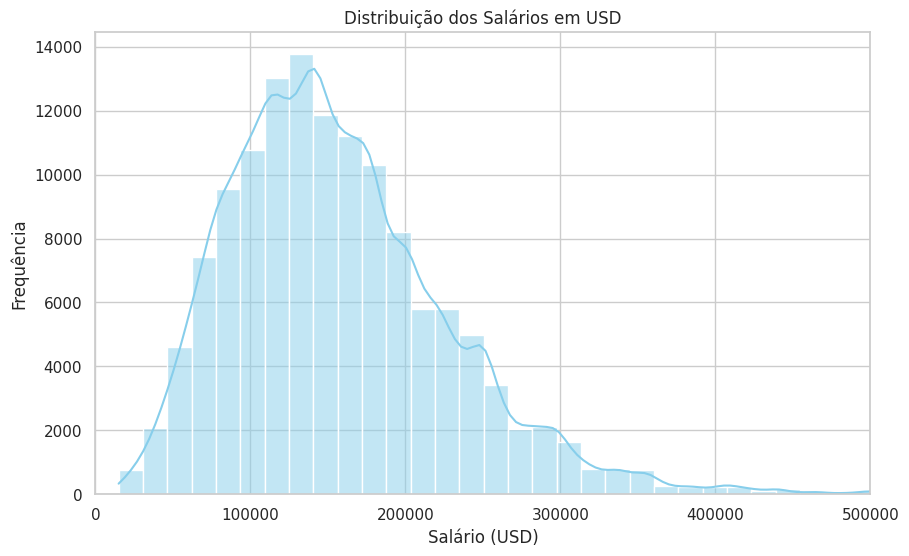

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição dos Salários em USD')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.xlim(0, 500000)  # para cortar valores muito altos e focar na massa
plt.show()


**Boxplot dos Salários para Identificar Outliers**

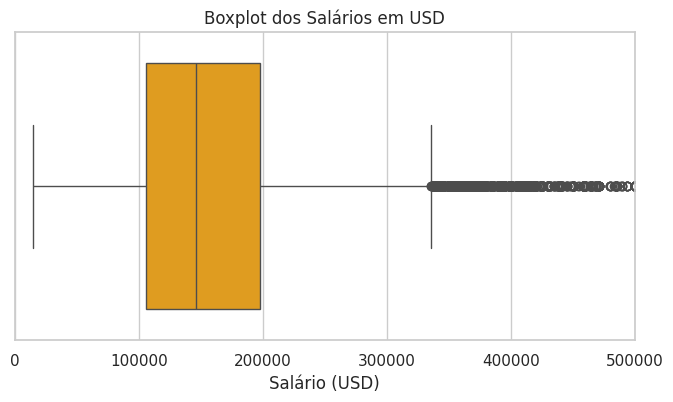

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['salary_in_usd'], color='orange')
plt.title('Boxplot dos Salários em USD')
plt.xlabel('Salário (USD)')
plt.xlim(0, 500000)  # facilita a visualização
plt.show()


**Salário Médio por Nível de Experiência**

/tmp/ipython-input-12-3527450478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator='mean', palette='viridis')


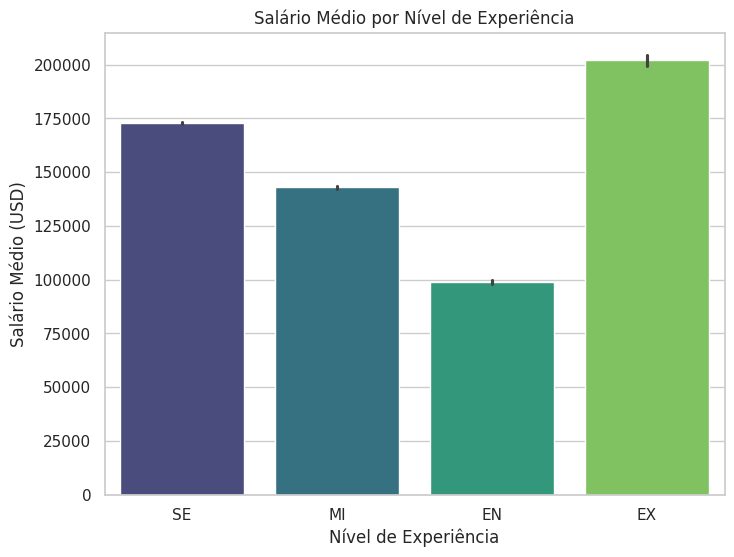

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator='mean', palette='viridis')
plt.title('Salário Médio por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio (USD)')
plt.show()


**Contagem de Tipos de Trabalho Remoto**

/tmp/ipython-input-13-680986956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='remote_ratio', palette='Set2')


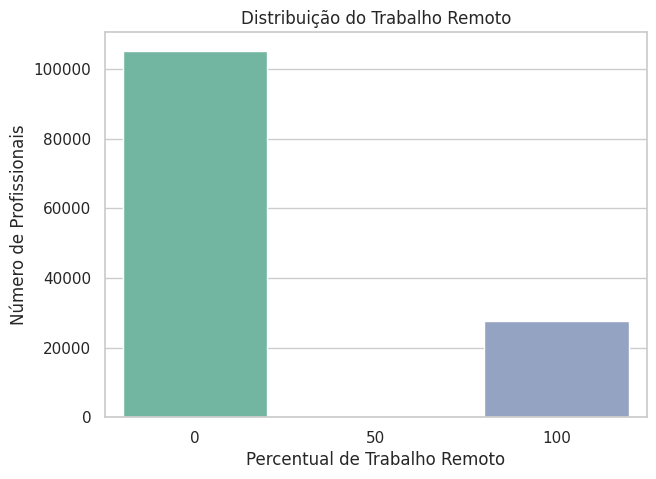

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='remote_ratio', palette='Set2')
plt.title('Distribuição do Trabalho Remoto')
plt.xlabel('Percentual de Trabalho Remoto')
plt.ylabel('Número de Profissionais')
plt.show()


**Salário Médio por Tamanho da Empresa**

/tmp/ipython-input-14-2631545807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='company_size', y='salary_in_usd', estimator='mean', palette='pastel')


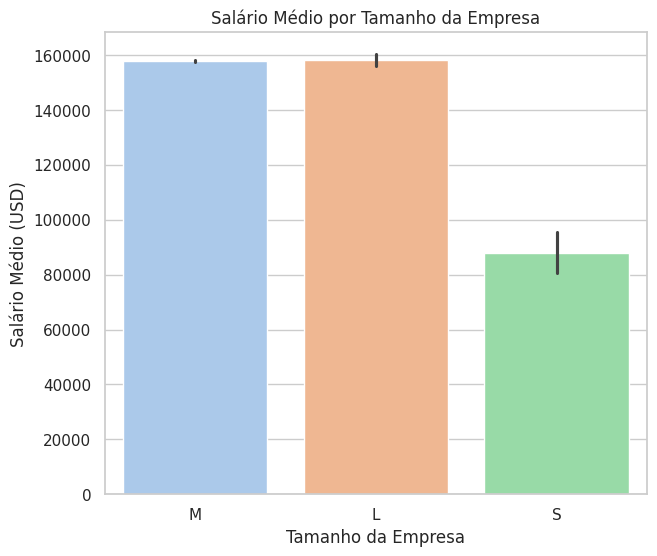

In [14]:
plt.figure(figsize=(7, 6))
sns.barplot(data=df, x='company_size', y='salary_in_usd', estimator='mean', palette='pastel')
plt.title('Salário Médio por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Salário Médio (USD)')
plt.show()


**Tendência de Salário ao Longo dos Anos**

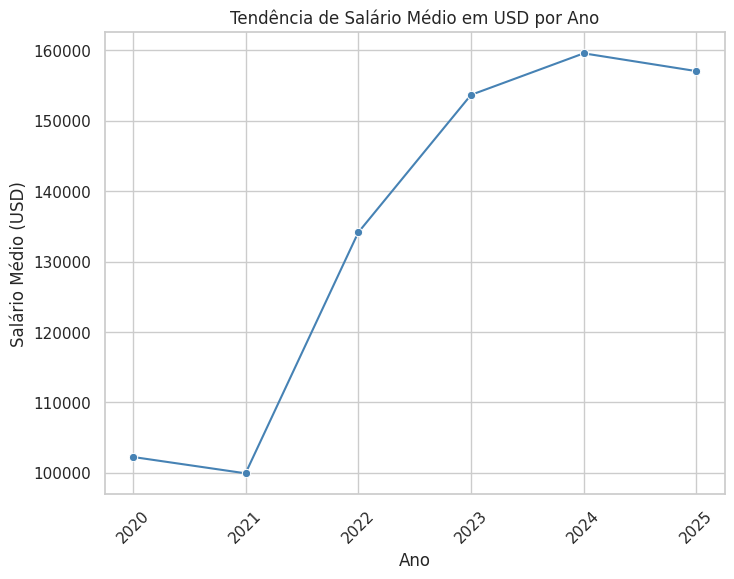

In [15]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=df.groupby('work_year')['salary_in_usd'].mean().reset_index(),
    x='work_year',
    y='salary_in_usd',
    marker='o',
    color='steelblue'
)
plt.title('Tendência de Salário Médio em USD por Ano')
plt.xlabel('Ano')
plt.ylabel('Salário Médio (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Salário Médio por País de Residência do Profissional**

/tmp/ipython-input-16-4180388267.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


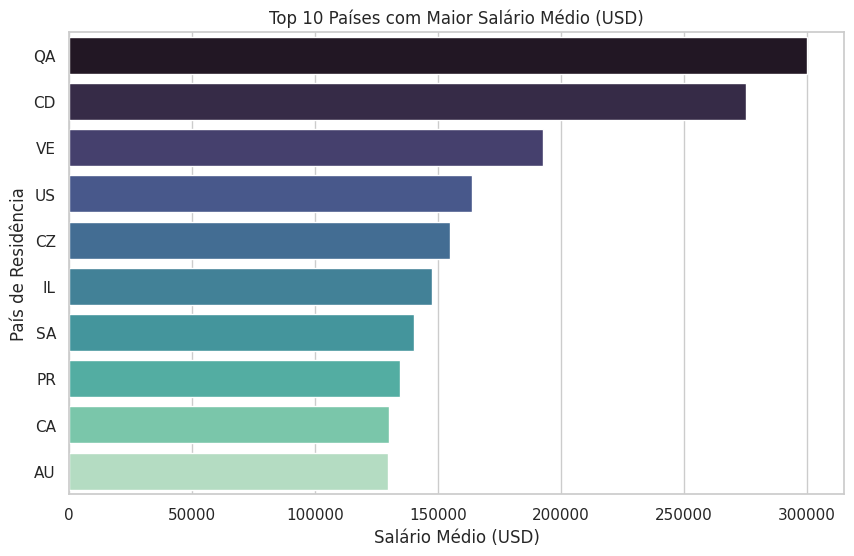

In [16]:
# Top 10 países com maior salário médio
top_paises = (
    df.groupby('employee_residence')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_paises,
    x='salary_in_usd',
    y='employee_residence',
    palette='mako'
)
plt.title('Top 10 Países com Maior Salário Médio (USD)')
plt.xlabel('Salário Médio (USD)')
plt.ylabel('País de Residência')
plt.show()


**Mapa Geográfico com Plotly – Salário Médio por País**

In [17]:
!pip install plotly


Código do mapa

In [26]:
import plotly.express as px

# Média salarial por país de residência
salario_pais = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
salario_pais.columns = ['country', 'avg_salary_usd']

# Mapa coroplético
fig = px.choropleth(
    salario_pais,
    locations='country',
    locationmode='ISO-3',  # códigos de país de 2 letras
    color='avg_salary_usd',
    hover_name='country',
    color_continuous_scale='Blues',
    title='Salário Médio por País (USD)'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


In [27]:
!pip install pycountry

import pycountry

# Função para converter código de país de 2 letras para 3 letras (ISO-3)
def alpha2_to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Aplicar conversão
salario_pais = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
salario_pais['iso_alpha3'] = salario_pais['employee_residence'].apply(alpha2_to_alpha3)

# Remover países não reconhecidos
salario_pais = salario_pais.dropna(subset=['iso_alpha3'])

# Plotar o mapa
import plotly.express as px

fig = px.choropleth(
    salario_pais,
    locations='iso_alpha3',
    locationmode='ISO-3',
    color='salary_in_usd',
    hover_name='employee_residence',
    color_continuous_scale='Blues',
    title='Salário Médio por País (USD)'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


In [22]:
import ipywidgets as widgets
from IPython.display import display

# Lista única de cargos
cargos = sorted(df['job_title'].unique())

# Widget Dropdown
dropdown = widgets.Dropdown(
    options=cargos,
    description='Cargo:',
    layout=widgets.Layout(width='50%')
)

# Função para atualizar gráfico com base na seleção
def atualizar_grafico(cargo_selecionado):
    subset = df[df['job_title'] == cargo_selecionado]

    plt.figure(figsize=(10, 5))
    sns.histplot(subset['salary_in_usd'], bins=30, kde=True, color='purple')
    plt.title(f'Distribuição Salarial para o Cargo: {cargo_selecionado}')
    plt.xlabel('Salário (USD)')
    plt.ylabel('Frequência')
    plt.xlim(0, 500000)
    plt.grid(True)
    plt.show()

# Conectar o widget à função
widgets.interact(atualizar_grafico, cargo_selecionado=dropdown);


interactive(children=(Dropdown(description='Cargo:', layout=Layout(width='50%'), options=('AI Architect', 'AI …